# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 2: Naïve Bayes Classifier ##


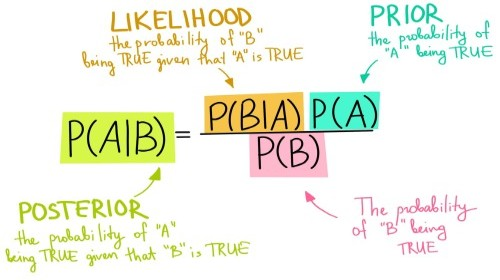

## Task 0: Mount Google Drive and Import Libraries
Download and save a copy of the Lab2 Notebook and Datasets (*train_features.csv*, *train_labels.csv*, *test_features.csv*, *test_labels.csv*) to your Google Drive, ensuring that all these files are in the same location.

In [1]:
if __name__ == '__main__':
  from google.colab import drive
  drive.mount("/content/drive")

Mounted at /content/drive


Modify the pathway of the *%cd* shell command according to the location in your Google Drive where you have saved the Notebook and datasets. For example, if you saved the files the files in this location:

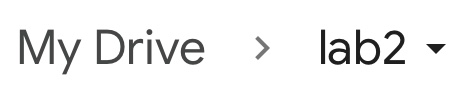

then you can run the following `%cd` code to access that directory:

```
%cd "/content/drive/MyDrive/lab2"
```

You can also run the following code to ensure you are in the correct working directory.

```
%ls
```

It should display the filenames of *lab2_task.ipynb*, *train_features.csv*, *train_labels.csv*, *test_features.csv*, *test_labels.csv*.

In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/lab2"
%ls

/content/drive/MyDrive/Colab Notebooks/lab2
lab2_2_task.ipynb    test_dataset.npy   test_labels.csv  train_dataset.npy   train_labels.csv
lab2_task.ipynb.txt  test_features.csv  test_labels.npy  train_features.csv  train_labels.npy


For this lab activity, we will use the **Numpy** library. You can import these by running the code below:

In [3]:
import numpy as np

## Dataset Description

The data is about the success of telephone scams. The given data can be used to predict whether or not a person will fall prey to a scam based on some personal attributes.

The features include both categorical and numerical variables. The categorical and binary features are as follows:

* marital status: {0 - single, 1 - married, 2 - divorced}
* educational level: {0 - primary, 1 - secondary, 2 - tertiary}
* has a housing loan?: {0 - no, 1 - yes}
* has a personal loan?: {0 - no, 1 - yes}

The numerical features are as follows:
* age: {min: 18.000000, mean: 40.936210, max: 95.000000}
* latest bank balance: {min: -8019.000000, mean: 1362.272058, max: 102127.000000}
* telephone call duration (in seconds): { min: 0.000000, mean: 258.163080, max: 4918.000000}

Relevant information on the datasets can be retrieved by running the code below:

In [6]:
if __name__ == '__main__':
  X_train = np.loadtxt("train_features.csv", delimiter=",", skiprows=1)
  X_test = np.loadtxt("test_features.csv", delimiter=",", skiprows=1)
  y_train = np.loadtxt("train_labels.csv", delimiter=",", skiprows=1)
  y_test = np.loadtxt("test_labels.csv", delimiter=",", skiprows=1)
  print(y_train)

[0. 0. 0. ... 1. 0. 0.]


## Task 1: Estimate prior probabilities

Here is the general form of the equation for obtaining the prior probabilities:

$$P(belief=j)= \frac{\text{count samples}(belief=j)}{\text{train size}}$$

For this lab activity, you do **not** need to apply Laplace smoothing on the prior probabilities.

Although there are only two classes here, note that your solution should be applicable to 2 or more classes.

This means you should **not** make a solution like: $prior_{(y=0)} = 1 - prior_{(y=1)}$

**Todo:** Implement the *estimate_priors()* function that calculates the prior probabilities for each belief.

**Some hints:**
* Useful Numpy functions include `numpy.sum()`, `numpy.arange()`, `numpy.expand_dims()` or `array.reshape()`,...
* You can apply this masking trick to index the samples with a particular belief:
  * Let's say you have a dataset with beliefs `y = np.array([0, 1, 2, 2, 1, 1])`
  * And you want to count the number of samples with belief `1`
  * Then you can get the indices of the samples with the code `y == 1`, which results in an array of boolean values `array([False,  True, False, False,  True,  True])`
  * After applying masking, you can take the sum of these boolean values to count the number of `True` values.

In [9]:
if __name__ == '__main__':
  X_train = np.loadtxt("train_features.csv", delimiter=",", skiprows=1)
  X_test = np.loadtxt("test_features.csv", delimiter=",", skiprows=1)
  y_train = np.loadtxt("train_labels.csv", delimiter=",", skiprows=1)
  y_test = np.loadtxt("test_labels.csv", delimiter=",", skiprows=1)
  deltas = (y_train.reshape(-1, 1))
  print(np.sum(deltas,axis=0))

[3506.]


In [7]:
# Task 1: Estimate priors

def estimate_priors(y_train):
  # y_train: a 1D numpy array with shape (num_train_samples, )

  # TODO start
  num_classes=np.shape(y_train)[0]
  deltas = y_train.reshape(-1, 1)
  class_priors = (np.sum(deltas,axis=0))/(self.train_size+self.num_classes)
  # TODO end

  return class_priors
  # class priors: a 1D numpy array with shape (num_classes, )

## Task 2: Estimate the likelihood for a categorical feature

Here is the general form for calculating the likelihood of a categorical feature:
$$P(feature_i=yes|belief=j)=\frac{\text{count samples}(feature_i=yes \& belief=j)+1}{\text{count samples}(belief=j)+\text{num feature classes}}$$

**Todo:**
* Implement a `cat_likelihood` function that computes the likelihood for a **single** categorical feature.
* The function should return a numpy array with size (num_test_samples, num_classes) where the values correspond to the category type of that feature. Here, num_classes is the number of kinds of beliefs.

**Some hints:**
* Notice that we applied Laplace smoothing.
* You can apply masking again to quickly count the number of samples with a particular feature category.
* Useful Numpy functions include `numpy.max()`, `numpy.arange()`, `numpy.dot()`, ...







In [ ]:
# Task 2: Likelihood for categorical feature

def cat_likelihood(X_train_feature, y_train, X_test_feature):
  # X_train_feature: a 1D numpy array with shape (num_train_samples, )
  # y_train: a 1D numpy array with shape (num_train_samples, )
  # X_test_feature: a 1D numpy array with shape (num_test_samples, )

  # TODO start
  likelihoods = []
  deltas = (np.arange(self.num_classes) == self.train_labels.reshape(-1, 1)).astype(int)
  for feature in np.arange(self.num_features):
    deltas2 = (np.arange(self.num_feature_categories[feature]) == self.train_dataset[:,feature].reshape(-1, 1)).astype(int)
    feature_category_counts = np.dot(deltas2.transpose(),deltas)
    eature_likelihood = (feature_category_counts + 1) / (np.sum(deltas,axis=0) + self.num_feature_categories[feature])
    likelihoods.append(feature_likelihood)
  # TODO end

  return feat_likelihood
  # feat_likelihood: a 2D numpy array with shape (num_test_samples, num_classes)

## Task 3: Estimate the likelihood for a numerical feature

Here is the general form for calculating the likelihood of a numerical variable:
$$P(feature_i=x|belief=j)=\frac{1}{\sqrt{2 \pi \sigma_j^2}} \exp{ \left( -\frac{(x-\mu_j)^2}{2 \sigma_j^2} \right)}$$

**Todo:**
In general: Implement a `num_likelihood` function that computes the likelihood for a **single** numerical feature.
1. Implement a `feature_mean` function that calculates the mean feature value $\mu_j$ for samples according to their belief $j$.
2. Implement a `feature_var` function that calculates the variance of feature value $\sigma_j^2$ for samples according to their belief $j$.
$$ \sigma_j^2 = \frac{1}{n_j} \sum_{i=1}^{n_j}{(x_i - \mu_j)^2} $$
3. Consolidate these functions in a `num_likelihood` function that calculates the likelihood value.
The function should return a numpy array with size (num_test_samples, num_classes) where the values correspond to the value of that feature.

**Some hints:**
* Useful numpy functions include many of the functions suggested in previous tasks, `numpy.square()`, `numpy.exp()`, `numpy.sqrt()`, ...



In [ ]:
def num_likelihood(X_train_feature, y_train, X_test_feature):
  # X_train_feature: a 1D numpy array with shape (num_train_samples, )
  # y_train: a 1D numpy array with shape (num_train_samples, )
  # X_test_feature: a 1D numpy array with shape (num_test_samples, )
  def feature_mean(X_train_feature, y_train):
    # TODO Part 1 start

    # TODO Part 1 end
    return mean
    # mean: a 1D numpy array with shape (num_classes, )

  def feature_var(X_train_feature, y_train):
    # TODO Part 2 start

    # TODO Part 2 end
    return var
    # var: a 1D numpy array with shape (num_classes, )

  mean = feature_mean(X_train_feature, y_train)
  var = feature_var(X_train_feature, y_train)
  # TODO Part 3 start

  # TODO Part 3 end

  return feat_likelihood
  # feat_likelihood: a 2D numpy array with shape (num_test_samples, num_classes)

## Task 4: Prediction

The predicted class is based on the posterior probability. Here is the general form of the posterior probability:

$$P(belief=j|features)=\frac{P(belief=j)P(f_1|belief=j)P(f_2|belief=j)P(f_3|belief=j)\ldots P(f_m|belief=j)}{\sum_{i=1}^n P(belief=i)P(f_1|belief=i)P(f_2|belief=i)P(f_3|belief=i)\ldots P(f_m|belief=i)}$$

However, if we are only interested in the predicted class and not the exact posterior probability calculation, we __don't__ need to worry about the denominator (**Marginal Probability**), as the denominator is the same for all posterior probability values regardless of the belief. Hence, the prediction can be made by taking the argmax of the numerator:
$$\hat{y} = argmax_{j} P(belief=j)P(f_1|belief=j)P(f_2|belief=j)P(f_3|belief=j)\ldots P(f_m|belief=j)$$



In addition, multiplying several probability values by each other can result in floating-point underflow. So instead of using the equation above, it is recommended to base the prediction on the $\log$ og the numerator.

$$\hat{y} = argmax_{j}  \log P(belief=j) + \log P(f_1|belief=j) + \ldots + \log P(f_m|belief=j) $$

**Todo:**
* Implement a `predict` function that makes predictions for the test dataset.
* Use the functions you created in Tasks 1-3 in the `predict` function.




In [ ]:
def predict(X_train, y_train, X_test, feat_type_list):
  # X_train: a 2D numpy array with shape (num_train_samples, num_features)
  # y_train: a 1D numpy array with shape (num_train_samples, )
  # X_test: a 2D numpy array with shape (num_test_samples, num_features)
  # feat_type_list: a list of feature types in string form in the order of features in X_train and X_test
    # For example: feat_type_list = [ 'cat', 'cat', 'cat', 'cat', 'num', 'num', 'num']

  # TODO start

  # TODO end

  return test_predict
  # test_predict: a 1D numpy array with shape (num_test_samples, )

## Debugging space:

Here are some codes and partial results that you can use to check and debug your work. You can try other ways of debugging your work, but this part of the activity will not be graded.

**Important notes:**
* Make sure that the codes you add are inside `if __name__ == '__main__':`. Otherwise, there may be problems with checking your solution on ZINC.
* In ZINC, some functions `numpy.some_func(arr, ...)` are not the same as `arr.some_func(...)`. This will be fixed in future versions of ZINC. However, in the mean time, please use `numpy.some_func(arr, ...)`.

In [ ]:
if __name__ == '__main__':
  # Task 1
  priors = estimate_priors(y_train)
  print('The priors are ', priors) # [0.88446963 0.11553037]

  # Task 2
  feat_likelihood = cat_likelihood(X_train[:, 0], y_train, X_test[:, 0])
  print('The likelihood values for "marital status" for the first 5 test samples are', feat_likelihood[:5, :])
  '''[[0.2737297  0.35423197]
      [0.61026673 0.5292106 ]
      [0.11600358 0.11655742]
      [0.61026673 0.5292106 ]
      [0.11600358 0.11655742]]'''

  # Task 3
  feat_likelihood = num_likelihood(X_train[:, 4], y_train, X_test[:, 4])
  print('The likelihood values for "age" for the first 5 test samples are', feat_likelihood[:5, :])
  '''[[0.00032595 0.00217531]
      [0.01257581 0.01682234]
      [0.03691429 0.02835094]
      [0.03851424 0.03006992]
      [0.01664062 0.0195927 ]]'''

  # Task 4
  y_pred = predict(X_train, y_train, X_test, feat_type_list=[ 'cat', 'cat', 'cat', 'cat', 'num', 'num', 'num'])
  accuracy_score = np.sum(y_pred == y_test) / y_test.shape[0]
  print('The ratio of correct predictions to the whole dataset is ', accuracy_score)
  # 0.8794495271776736

